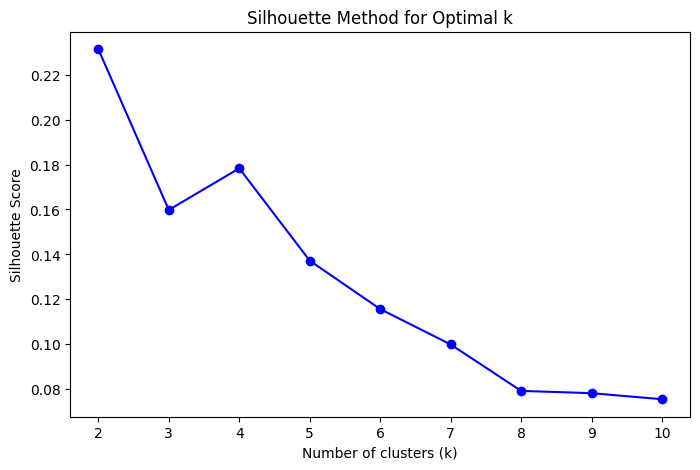

C:\Users\AYUSHI CHOUGULE\AppData\Local\Temp\ipykernel_29732\4119071568.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_data_no_outliers['Cluster_2'] = kmedoids_2.fit_predict(cc_scaled)


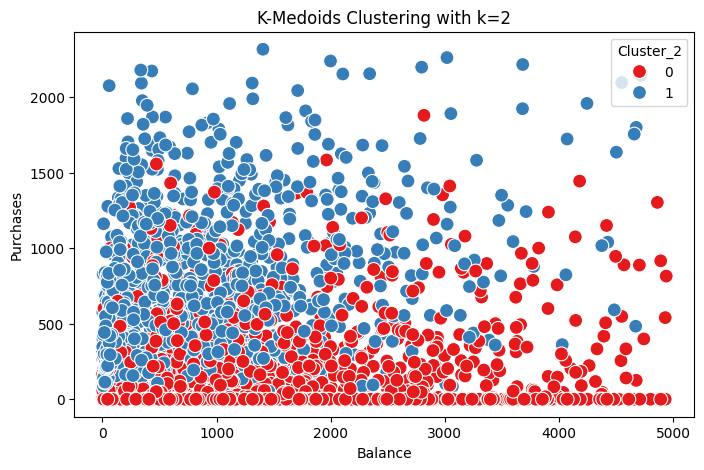

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Credit Card dataset
cc_data = pd.read_csv('CC_GENERAL.csv')

# Check the first few rows of the dataset
cc_data.head()

# Drop 'CUST_ID' or other non-essential columns if present
cc_data_cleaned = cc_data.drop(columns=['CUST_ID'], errors='ignore')

# Checking for missing values
cc_data_cleaned.isnull().sum()
# Fill missing values or remove columns with too many missing entries
cc_data_cleaned = cc_data_cleaned.fillna(cc_data_cleaned.mean())  # Filling missing values with the mean

# Outlier detection using Interquartile Range (IQR) for credit card dataset
Q1 = cc_data_cleaned.quantile(0.25)
Q3 = cc_data_cleaned.quantile(0.75)
IQR = Q3 - Q1
# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Check for outliers
outliers = ((cc_data_cleaned < lower_bound) | (cc_data_cleaned > upper_bound)).sum()
# Print outliers count per feature
outliers
# Remove extreme outliers from the dataset
cc_data_no_outliers = cc_data_cleaned[~((cc_data_cleaned < lower_bound) | (cc_data_cleaned > upper_bound)).any(axis=1)]
# Check the shape of the dataset after removing outliers
cc_data_no_outliers.shape

# Standardize the data
scaler = StandardScaler()
cc_scaled = scaler.fit_transform(cc_data_no_outliers)
# Display the first few rows of scaled data
pd.DataFrame(cc_scaled, columns=cc_data_no_outliers.columns).head()

# Finding the optimal number of clusters using the Silhouette score
silhouette_scores = []
K = range(2, 11)  # Start from 2 clusters since silhouette is undefined for 1 cluster

for k in K:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    cluster_labels = kmedoids.fit_predict(cc_scaled)

    # Calculate the silhouette score
    score = silhouette_score(cc_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plotting the Silhouette scores for different number of clusters
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

# Apply K-Medoids clustering with k=2
kmedoids_2 = KMedoids(n_clusters=2, random_state=42)
cc_data_no_outliers['Cluster_2'] = kmedoids_2.fit_predict(cc_scaled)

# Visualizing the clusters (if you want to visualize two features, you can change x and y)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=cc_data_no_outliers['BALANCE'],
                y=cc_data_no_outliers['PURCHASES'],
                hue=cc_data_no_outliers['Cluster_2'],
                palette='Set1',
                s=100)

plt.title('K-Medoids Clustering with k=2')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()
